In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [214]:
data= pd.read_csv('/home/jay/Downloads/level_progress.csv')
data.head()

,event_datetime,player_id,level_number,status,session_id
0,2020-11-28 21:00:24.958000,00020eac3d7e4f058b87eac1a9a85c25,6,complete,6ddf006b807e451eb4706d6d98a049b6
1,2020-11-27 22:03:03.048000,00020eac3d7e4f058b87eac1a9a85c25,2,start,3ba98db705f2aa0bc406441a61c23b3c
2,2020-11-26 14:53:09.344000,002188c0bc476f356f4c3b74e5cc66c8,1,start,25cf292a8f1d3da01df8371276502edf
3,2020-12-03 11:43:26.582000,00576ef3617e6bbbabfa0b1090e4122d,1,start,21fd6a7db53a9220574563ac8a8c8b58
4,2020-12-04 14:23:07.448000,00576ef3617e6bbbabfa0b1090e4122d,7,start,358b9ab5c1c0f08bc7def310411eb90f


In [215]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

data['status']= le.fit_transform(data['status'])
data.head()

,event_datetime,player_id,level_number,status,session_id
0,2020-11-28 21:00:24.958000,00020eac3d7e4f058b87eac1a9a85c25,6,0,6ddf006b807e451eb4706d6d98a049b6
1,2020-11-27 22:03:03.048000,00020eac3d7e4f058b87eac1a9a85c25,2,2,3ba98db705f2aa0bc406441a61c23b3c
2,2020-11-26 14:53:09.344000,002188c0bc476f356f4c3b74e5cc66c8,1,2,25cf292a8f1d3da01df8371276502edf
3,2020-12-03 11:43:26.582000,00576ef3617e6bbbabfa0b1090e4122d,1,2,21fd6a7db53a9220574563ac8a8c8b58
4,2020-12-04 14:23:07.448000,00576ef3617e6bbbabfa0b1090e4122d,7,2,358b9ab5c1c0f08bc7def310411eb90f


In [193]:
for d in range(data.shape[0]):
    if data.iloc[d]['player_id']=='00020eac3d7e4f058b87eac1a9a85c25':
        print(data.iloc[d][['session_id', 'level_number']])

session_id      6ddf006b807e451eb4706d6d98a049b6
level_number                                   6
Name: 0, dtype: object
session_id      3ba98db705f2aa0bc406441a61c23b3c
level_number                                   2
Name: 1, dtype: object
session_id      0bb2358fdb1e746ba08c846c535935b9
level_number                                   6
Name: 468, dtype: object
session_id      1e344ef01f635d3579bcd2e83dd09d96
level_number                                   3
Name: 469, dtype: object
session_id      b1fd9c8a1d53170c1fdad50e526cd2ca
level_number                                   2
Name: 702, dtype: object
session_id      1e344ef01f635d3579bcd2e83dd09d96
level_number                                   4
Name: 1248, dtype: object
session_id      31b49ea44754e94043eef618da2d6230
level_number                                   7
Name: 1638, dtype: object
session_id      7d1ca3357ddefe5154e087434942d565
level_number                                   9
Name: 1950, dtype: object
session_id      1

In [187]:
data['player_id'].unique()

array(['00020eac3d7e4f058b87eac1a9a85c25',
       '002188c0bc476f356f4c3b74e5cc66c8',
       '00576ef3617e6bbbabfa0b1090e4122d', ...,
       '00174511af1f714acaaf9d334e6f5fcb',
       '0096251442727f9a32e8fc3630df8f32',
       '00990cb7f25a81425f99f360fb38a62d'], dtype=object)

In [222]:
import statsmodels.formula.api as smf

In [207]:
pd.crosstab(data.status, data.level_number, margins= True)

level_number,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,All
status,,,,,,,,,,,,,,,,,,,,,
0,3736,3164,2671,1963,1640,1281,1002,785,637,538,...,2,2,1,1,2,1,1,1,0,20571
1,37,20,91,865,475,537,400,255,255,157,...,0,2,0,1,0,0,0,0,0,4146
2,428,3977,3535,4146,3023,2664,2243,1688,1487,1090,...,4,6,5,2,1,1,1,1,1,31109
All,4201,7161,6297,6974,5138,4482,3645,2728,2379,1785,...,6,10,6,4,3,2,2,2,1,55826


In [209]:
data.corr()

,level_number,status
level_number,1.000000,0.138101
status,0.138101,1.000000


In [83]:
# data= pd.get_dummies(data, columns=['status']).head()

In [148]:
len(data['player_id'].unique())

3872

In [147]:
data['session_id'].value_counts()>10



6259      True
12506     True
1007      True
6687      True
10874     True
         ...  
2894     False
11114    False
2926     False
9099     False
0        False
Name: session_id, Length: 12759, dtype: bool

In [124]:
for d in range(data.shape[0]):
    if data.iloc[d]['session_id'] == '14476fff6be4672e8794e220f7dcf98b':
        print(data.iloc[d]['status'])

start
start
complete
start
fail
start
complete
start
complete
start
start
complete
start
start
start
complete
complete
complete
start
start
fail
start
complete
complete
fail
start
start
start
start
complete
complete
complete
complete
start
start
start
complete
start
start
complete
start
fail
complete
fail
fail


In [183]:
data['player_id'].value_counts()[1225:]

006b0b4a416e1d97cb725f5882c0bd58    15
0032711c9c0569ba68f1dbc7d6f0f860    15
00761380471c48c30facaa8c68bfe35d    15
00353fc1f345fa8db6a28cadd7645b52    15
0064a5f516d5438f1cc5254b8d80a531    15
                                    ..
00528e2a546013a175fbafbf6bcfdeef     1
00ac2eeab604d557e18e77d7aeaf7c74     1
0099bce63c2584cc775a333012e6910c     1
000b6ba069dc1a061ef19e7157510fc9     1
005d543896ab848709c310541878c96b     1
Name: player_id, Length: 2647, dtype: int64

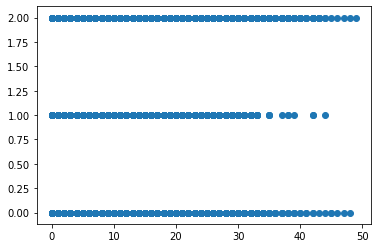

In [212]:
plt.scatter(data.level_number, data.status)

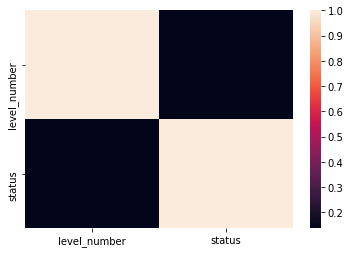

In [213]:
sns.heatmap(data.corr())

In [3]:
data['status'].value_counts()

start       31109
complete    20571
fail         4146
Name: status, dtype: int64

In [58]:
result= {}
for d in range(data.shape[0]):
    
    if data.iloc[d]['status']=='fail':
        #print(data.iloc[d]['level_number'])
        try:
            print(result[data.iloc[d]['level_number']])
            result[data.iloc[d]['level_number']]= result[data.iloc[d]['level_number']]+1
        except:
            result[data.iloc[d]['level_number']]= 1
            print(result)
        

{4: 1}
{4: 1, 3: 1}
1
{4: 2, 3: 1, 8: 1}
2
{4: 3, 3: 1, 8: 1, 9: 1}
1
1
{4: 3, 3: 2, 8: 2, 9: 1, 14: 1}
1
{4: 3, 3: 2, 8: 2, 9: 2, 14: 1, 5: 1}
{4: 3, 3: 2, 8: 2, 9: 2, 14: 1, 5: 1, 23: 1}
1
{4: 3, 3: 2, 8: 2, 9: 2, 14: 2, 5: 1, 23: 1, 10: 1}
1
2
3
4
5
1
{4: 3, 3: 6, 8: 2, 9: 2, 14: 2, 5: 2, 23: 2, 10: 1, 35: 1}
{4: 3, 3: 6, 8: 2, 9: 2, 14: 2, 5: 2, 23: 2, 10: 1, 35: 1, 0: 1}
2
6
3
{4: 4, 3: 7, 8: 3, 9: 2, 14: 2, 5: 2, 23: 2, 10: 1, 35: 1, 0: 1, 2: 1}
{4: 4, 3: 7, 8: 3, 9: 2, 14: 2, 5: 2, 23: 2, 10: 1, 35: 1, 0: 1, 2: 1, 6: 1}
1
7
2
3
8
4
9
10
11
{4: 5, 3: 12, 8: 3, 9: 2, 14: 2, 5: 4, 23: 2, 10: 1, 35: 1, 0: 1, 2: 2, 6: 1, 17: 1}
12
2
5
3
1
4
13
2
1
{4: 6, 3: 14, 8: 4, 9: 3, 14: 3, 5: 5, 23: 2, 10: 1, 35: 1, 0: 1, 2: 2, 6: 2, 17: 2, 11: 1}
6
3
{4: 7, 3: 14, 8: 4, 9: 3, 14: 4, 5: 5, 23: 2, 10: 1, 35: 1, 0: 1, 2: 2, 6: 2, 17: 2, 11: 1, 1: 1}
7
14
3
5
{4: 8, 3: 15, 8: 4, 9: 4, 14: 4, 5: 6, 23: 2, 10: 1, 35: 1, 0: 1, 2: 2, 6: 2, 17: 2, 11: 1, 1: 1, 13: 1}
8
2
15
{4: 9, 3: 16, 8: 4, 9: 4, 1

In [59]:
#result[data.iloc[0]['level_number']]= 0
result

{4: 475,
 3: 865,
 8: 255,
 9: 157,
 14: 105,
 5: 537,
 23: 39,
 10: 127,
 35: 3,
 0: 37,
 2: 91,
 6: 400,
 17: 56,
 11: 147,
 1: 20,
 13: 111,
 7: 255,
 24: 11,
 18: 36,
 12: 109,
 25: 10,
 44: 1,
 20: 21,
 32: 9,
 39: 1,
 42: 2,
 22: 37,
 15: 53,
 16: 55,
 27: 9,
 19: 39,
 29: 10,
 31: 6,
 21: 18,
 28: 9,
 30: 7,
 33: 5,
 26: 15,
 37: 1,
 38: 2}

In [219]:
x= result.values()
x

dict_values([475, 865, 255, 157, 105, 537, 39, 127, 3, 37, 91, 400, 56, 147, 20, 111, 255, 11, 36, 109, 10, 1, 21, 9, 1, 2, 37, 53, 55, 9, 39, 10, 6, 18, 9, 7, 5, 15, 1, 2])

In [151]:
data.corr()

,player_id,level_number,status,session_id
player_id,1.000000,0.049138,0.003314,-0.018111
level_number,0.049138,1.000000,0.138101,-0.000243
status,0.003314,0.138101,1.000000,0.000176
session_id,-0.018111,-0.000243,0.000176,1.000000


In [223]:
smf= smf.ols(formula='status ~ C(level_number)', data=data).fit()
smf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 status   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     120.4
Date:                Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:16:47   Log-Likelihood:                -73157.
No. Observations:               55826   AIC:                         1.464e+05
Df Residuals:                   55776   BIC:                         1.469e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.2126      0.014     15.350      0.000       0.185       0.240
C(level_number)[T.1]      0.9010      0.017     51.649      0.000       0.867       0.935
C(level_number)[T.2]      0.9246      0.018     51.711      0.000       0.890       0.960
C(level_number)[T.3]      1.1005      0.018     62.775      0.000       1.066       1.135
C(level_number)[T.4]      1.0566      0.019     56.592      0.000       1.020       1.093
C(level_number)[T.5]      1.0960      0.019     56.860      0.000       1.058       1.134
C(level_number)[T.6]      1.1279      0.020     55.512      0.000       1.088       1.168
C(level_number)[T.7]      1.1184      0.022     50.675      0.000       1.075       1.162
C(level_number)[T.8]      1.1447      0.023     49.703      0.000       1.100       1.190
C(level_number)[T.9]      1.0967      0.025     43.244      0.000       1.047       1.146
C(level_number)[T.10]     1.0876      0.027     40.243      0.000       1.035       1.141
C(level_number)[T.11]     1.0937      0.028     39.630      0.000       1.040       1.148
C(level_number)[T.12]     1.1199      0.029     37.970      0.000       1.062       1.178
C(level_number)[T.13]     1.1320      0.031     36.398      0.000       1.071       1.193
C(level_number)[T.14]     1.1498      0.033     34.603      0.000       1.085       1.215
C(level_number)[T.15]     1.1018      0.038     29.163      0.000       1.028       1.176
C(level_number)[T.16]     1.1135      0.039     28.384      0.000       1.037       1.190
C(level_number)[T.17]     1.1662      0.040     28.814      0.000       1.087       1.246
C(level_number)[T.18]     1.1131      0.045     24.569      0.000       1.024       1.202
C(level_number)[T.19]     1.0717      0.047     22.844      0.000       0.980       1.164
C(level_number)[T.20]     1.1137      0.051     21.734      0.000       1.013       1.214
C(level_number)[T.21]     1.0594      0.058     18.131      0.000       0.945       1.174
C(level_number)[T.22]     1.1243      0.055     20.463      0.000       1.017       1.232
C(level_number)[T.23]     1.1272      0.057     19.615      0.000       1.015       1.240
C(level_number)[T.24]     1.0887      0.073     14.876      0.000       0.945       1.232
C(level_number)[T.25]     1.1093      0.069     15.974      0.000       0.973       1.245
C(level_number)[T.26]     1.1785      0.073     16.102      0.000       1.035       1.322
C(level_number)[T.27]     1.1234      0.081     13.949      0.000       0.966       1.281
C(level_number)[T.28]     1.2525      0.080     15.611      0.000       1.095       1.410
C(level_number)[T.29]     1.2831      0.085     15.124      0.000       1.117       1.449
C(level_number)[T.30]     1.1551      0.110     10.527      0.000       0.940       1.370
C(level_number)[T.31]  